In [41]:
#importing everything we need 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


loading all our csv files to clean 

In [7]:
daily_activity_df = pd.read_csv('dailyActivity_merged.csv')
daily_steps_df = pd.read_csv('dailySteps_merged.csv')
sleep_day_df = pd.read_csv('sleepDay_merged.csv')
heart_rate_df = pd.read_csv('heartrate_seconds_merged.csv')
weight_log_df = pd.read_csv('weightLogInfo_merged.csv')

Gathering information about our columns 

In [9]:
daily_activity_df.head(), daily_steps_df.head(), sleep_day_df.head(), heart_rate_df.head(), weight_log_df.head()


(           Id ActivityDate  TotalSteps  TotalDistance  TrackerDistance  \
 0  1503960366    4/12/2016       13162           8.50             8.50   
 1  1503960366    4/13/2016       10735           6.97             6.97   
 2  1503960366    4/14/2016       10460           6.74             6.74   
 3  1503960366    4/15/2016        9762           6.28             6.28   
 4  1503960366    4/16/2016       12669           8.16             8.16   
 
    LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \
 0                       0.0                1.88                      0.55   
 1                       0.0                1.57                      0.69   
 2                       0.0                2.44                      0.40   
 3                       0.0                2.14                      1.26   
 4                       0.0                2.71                      0.41   
 
    LightActiveDistance  SedentaryActiveDistance  VeryActiveMinutes  \
 0     

checking the types for cleaning 

In [12]:
daily_activity_df.dtypes

Id                                   int64
ActivityDate                datetime64[ns]
TotalSteps                           int64
TotalDistance                      float64
TrackerDistance                    float64
LoggedActivitiesDistance           float64
VeryActiveDistance                 float64
ModeratelyActiveDistance           float64
LightActiveDistance                float64
SedentaryActiveDistance            float64
VeryActiveMinutes                    int64
FairlyActiveMinutes                  int64
LightlyActiveMinutes                 int64
SedentaryMinutes                     int64
Calories                             int64
dtype: object

In [24]:
daily_steps_df.dtypes

Id                      int64
ActivityDay    datetime64[ns]
StepTotal               int64
dtype: object

changing Activity from object to Datetime

In [11]:
daily_activity_df['ActivityDate'] = pd.to_datetime(daily_activity_df['ActivityDate'], format='%m/%d/%Y')


In [17]:
daily_steps_df['ActivityDay'] = pd.to_datetime(daily_steps_df['ActivityDay'], format='%m/%d/%Y')

In [23]:
sleep_day_df.dtypes

Id                             int64
SleepDay              datetime64[ns]
TotalSleepRecords              int64
TotalMinutesAsleep             int64
TotalTimeInBed                 int64
dtype: object

In [19]:
sleep_day_df['SleepDay']= pd.to_datetime(sleep_day_df['SleepDay'].str.split(' ').str[0], format='%m/%d/%Y')

In [21]:
heart_rate_df['Time']= pd.to_datetime(heart_rate_df['Time'])

In [22]:
weight_log_df['Date']= pd.to_datetime(weight_log_df['Date'].str.split(' ').str[0],format='%m/%d/%Y' )

In [27]:
heart_rate_df.dtypes,weight_log_df.dtypes

(Id                int64
 Time     datetime64[ns]
 Value             int64
 dtype: object,
 Id                         int64
 Date              datetime64[ns]
 WeightKg                 float64
 WeightPounds             float64
 Fat                      float64
 BMI                      float64
 IsManualReport              bool
 LogId                      int64
 dtype: object)

checking for missing values 

In [38]:
missing_values_summary = {
    'daily_activity_df': daily_activity_df.isnull().sum(),
    'daily_steps_df': daily_steps_df.isnull().sum(),
    'sleep_day_df': sleep_day_df.isnull().sum(),
    'heart_rate_df': heart_rate_df.isnull().sum(),
    'weight_log_df': weight_log_df.isnull().sum()
}

missing_values_summary

{'daily_activity_df': Id                          0
 ActivityDate                0
 TotalSteps                  0
 TotalDistance               0
 TrackerDistance             0
 LoggedActivitiesDistance    0
 VeryActiveDistance          0
 ModeratelyActiveDistance    0
 LightActiveDistance         0
 SedentaryActiveDistance     0
 VeryActiveMinutes           0
 FairlyActiveMinutes         0
 LightlyActiveMinutes        0
 SedentaryMinutes            0
 Calories                    0
 dtype: int64,
 'daily_steps_df': Id             0
 ActivityDay    0
 StepTotal      0
 dtype: int64,
 'sleep_day_df': Id                    0
 SleepDay              0
 TotalSleepRecords     0
 TotalMinutesAsleep    0
 TotalTimeInBed        0
 dtype: int64,
 'heart_rate_df': Id       0
 Time     0
 Value    0
 dtype: int64,
 'weight_log_df': Id                 0
 Date               0
 WeightKg           0
 WeightPounds       0
 Fat               65
 BMI                0
 IsManualReport     0
 LogId           

removing missing values from our "Fat" column

In [39]:
weight_log_df_clean = weight_log_df.dropna(subset=['Fat'])
weight_log_df_clean.head()


,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,2016-05-02,52.599998,115.963147,22.0,22.650000,True,1462233599000
5,4319703577,2016-04-17,72.400002,159.614681,25.0,27.450001,True,1460937599000


Checking for duplicates in our dataset and dropping if there is any 

In [29]:
daily_activity_df.drop_duplicates(inplace=True)
daily_steps_df.drop_duplicates(inplace=True)
sleep_day_df.drop_duplicates(inplace=True)
heart_rate_df.drop_duplicates(inplace=True)
weight_log_df.drop_duplicates(inplace=True)

In [30]:
daily_activity_df.shape

(940, 15)

In [31]:
daily_activity_summary_stats = daily_activity_df.describe()

daily_activity_summary_stats

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000


creating visualization and setting the aesthetic style
figure one is the distribution of total steps
figure two is Daily Active Minutes (Very Active vs Lightly Active)
figure three is Relationship Between Active Minutes and Calories Burned

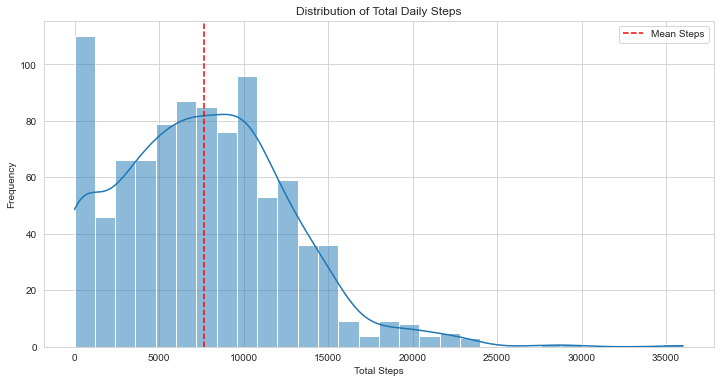

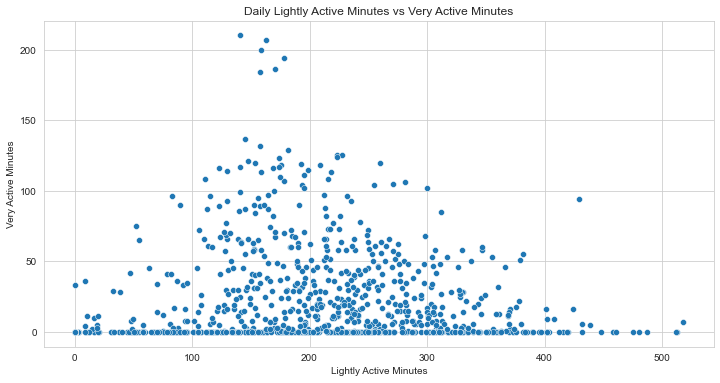

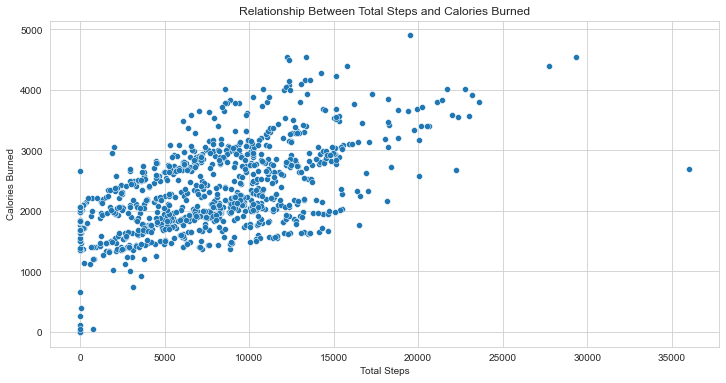

In [32]:
sns.set_style("whitegrid")


plt.figure(figsize=(12, 6))
sns.histplot(daily_activity_df['TotalSteps'], bins=30, kde=True)
plt.title('Distribution of Total Daily Steps')
plt.xlabel('Total Steps')
plt.ylabel('Frequency')
plt.axvline(daily_activity_df['TotalSteps'].mean(), color='red', linestyle='--', label='Mean Steps')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(x='LightlyActiveMinutes', y='VeryActiveMinutes', data=daily_activity_df)
plt.title('Daily Lightly Active Minutes vs Very Active Minutes')
plt.xlabel('Lightly Active Minutes')
plt.ylabel('Very Active Minutes')
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(x='TotalSteps', y='Calories', data=daily_activity_df)
plt.title('Relationship Between Total Steps and Calories Burned')
plt.xlabel('Total Steps')
plt.ylabel('Calories Burned')
plt.show()


here we Analyze Activity and Sleep Patterns and calculate avg daily steps, sleep duration and quality metrics

In [33]:
avg_daily_steps = daily_activity_df['TotalSteps'].mean()
avg_sleep_duration = sleep_day_df['TotalMinutesAsleep'].mean() / 60  # Convert to hours
avg_sleep_efficiency = (sleep_day_df['TotalMinutesAsleep'] / sleep_day_df['TotalTimeInBed']).mean() * 100

activity_sleep_summary = {
    "Average Daily Steps": avg_daily_steps,
    "Average Sleep Duration (hours)": avg_sleep_duration,
    "Average Sleep Efficiency (%)": avg_sleep_efficiency
}

activity_sleep_summary


{'Average Daily Steps': 7637.9106382978725,
 'Average Sleep Duration (hours)': 6.986219512195122,
 'Average Sleep Efficiency (%)': 91.64667080104194}

saving documents to use for tableau 

In [40]:
daily_activity_df.to_csv('daily_activity_cleaned.csv', index=False)

sleep_day_df.to_csv('sleep_day_cleaned.csv', index=False)

heart_rate_df.to_csv('heart_rate_cleaned.csv', index=False)

weight_log_df.to_csv('weight_log_cleaned.csv', index=False)
